**This is a test for a public Jupyter Notebook.**

In [1]:
# Load the following python packages
import numpy as np
from matplotlib import pyplot as plt
# make plots appear within the notebook
%matplotlib inline
from scipy.integrate import odeint

**Euler method**

Consider the initial value problem (IVP)
$$ \tfrac{\mathrm{d}}{\mathrm{d}t} x(t) = f(x(t)), \quad x(0) = x^0. $$
A simple approach to solve this IVP numerically is to consider the approximation of the derivative via the quotient of differences, i.e.
$$ f(x(t)) = \tfrac{\mathrm{d}}{\mathrm{d}t} x(t) \approx \frac{x(t+\varepsilon) - x(t)}{\varepsilon} $$
for small values of $\varepsilon > 0$. 

This idea motivates the following iterative scheme to solve IVP:
1. $x(0) = x^0$
2. $x(t_{n+1}) = x(t_n) + h f(x(t_n))$
for some predefined step size $h > 0$. 

**Logistic growth**

Consider the IVP
$$ \tfrac{\mathrm{d}}{\mathrm{d}t} N(t) = rN(t) \left(1 - \frac{N(t)}{K} \right), \quad N(0) = N^0$$
for some initial value $N^0 \in \mathbb{N}$, upper bound $K \in \mathbb{N}$, and growth rate $r > 0$.

**Excercise**

Use the Euler method to solve determine the population after 20 time units, starting with $N^0 = 50$, growth rate $r = 0.3$ and $K = 1000$.

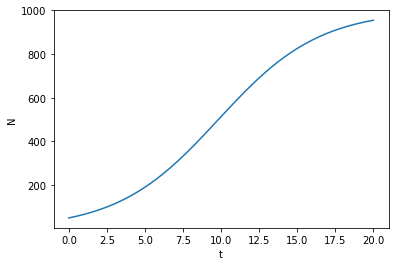

In [2]:
def loggrowth(N, t=0, r=0.3, K=1000):
    return r*N*(1-N/K)

def myEuler(f, x0, t0, tend, h=1e-3):
    # intialization
    n = 0
    t = np.arange(t0, tend, h)
    
    x = np.zeros(len(t)+1)
    x[n] = x0
    
    # Euler step
    for s in t:
        x[n+1] = x[n] + h*f(x[n])
        n = n+1
        
    return [t, x]

N0 = 50
t0 = 0
tend = 20

[t, x] = myEuler(loggrowth, N0, t0, tend)

plt.xlabel("t")
plt.ylabel("N")
plt.plot(t,x[:-1])

The solution should look like this:

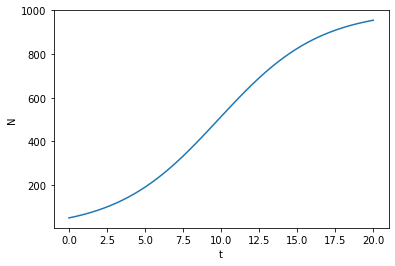

In [3]:
def loggrowth(N, t, r=0.3, K=1000):
    return r*N*(1-N/K)

# time discretization
ts = np.linspace(0, 20, 1000)

# intial value
N0 = 50

# solve ODE 
Ns = odeint(loggrowth, N0, ts)

plt.xlabel("t")
plt.ylabel("N")
plt.plot(ts,Ns[:,0])